# Summary Statistics Based on Moments test
Comparison  between statistics of HH and application of same operations on DAP cell model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as spstats

In [3]:
from dap import DAPcython
from dap.utils import obs_params, obs_params_gbar, syn_current

In [4]:
# define sumstats parameters
n_mom = 5
n_xcorr = 4

## DAP model

In [4]:
dt = 0.01
params, labels = obs_params_gbar(reduced_model=True)
I, time, t_on, t_off = syn_current(duration=120, dt=0.01)

In [5]:
time

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1998e+02, 1.1999e+02,
       1.2000e+02])

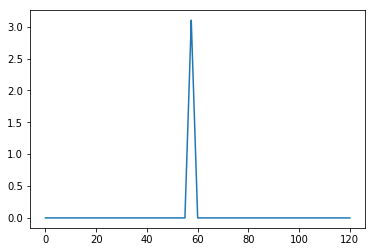

In [6]:
plt.plot(time, I);

In [7]:
params  = params *10

In [8]:
# define models / check setters
dap = DAPcython(-75, params)

In [9]:
# run models
data = dap.simulate(0.01, time, I)

In [46]:
dap_res =  {'data': data.reshape(-1),
        'time': time,
        'dt': dt,
        'I': I}

In [47]:
dap_res['data']

array([-75.00890265, -75.00230327, -75.01455504, ..., -77.49829281,
       -77.49660779, -77.48137278])

In [48]:
x = dap_res
t = dap_res['time']

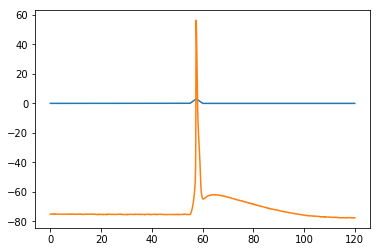

In [13]:
plt.plot(time, I)
plt.plot(time, data);

### Summary Statistics Moments

In [14]:
N = x['data'].shape[0]
t = x['time']
dt = x['dt']

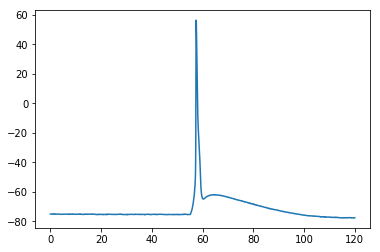

In [15]:
# initialise array of spike counts
v = np.array(x['data'])
plt.plot(t, v);

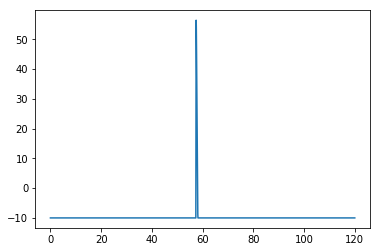

In [16]:
# put everything to -10 that is below -10 or has negative slope
ind = np.where(v < -10)
v[ind] = -10
plt.plot(t, v);

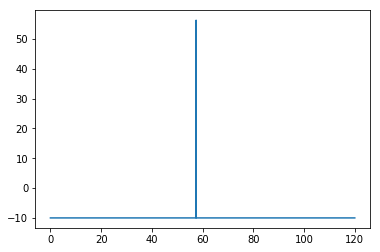

In [17]:
ind = np.where(np.diff(v) < 0)
v[ind] = -10
plt.plot(t, v);

In [18]:
# remaining negative slopes are at spike peaks
ind = np.where(np.diff(v) < 0)
spike_times = np.array(t)[ind]
spike_times

array([57.45])

In [19]:
spike_times_stim = spike_times[(spike_times > t_on) & (spike_times < t_off)]
spike_times_stim

array([57.45])

In [20]:
spike_max = x['data'][ind]
spike_max

array([56.26036556])

In [21]:
# number of spikes
if spike_times_stim.shape[0] > 0:
    spike_times_stim = spike_times_stim[np.append(1, np.diff(spike_times_stim))>0.5]

spike_times_stim

array([57.45])

### Resting potential

In [22]:
# resting potential and std
rest_pot = np.mean(x['data'][t<t_on])
rest_pot_std = np.std(x['data'][int(.9*t_on/dt):int(t_on/dt)])

# TODO: Find relevant lenght of the signal to analyse, not t_on, t_off

In [5]:
# initialise array of spike counts
v_all = np.array(x['data'])
plt.plot(t, v_all);

NameError: name 'x' is not defined

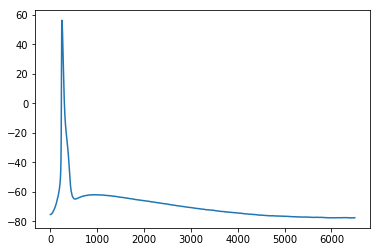

In [37]:
v_dap = np.copy(np.array(x['data']))
v_dap = v_dap[(t>t_on)]
plt.plot(v_dap);

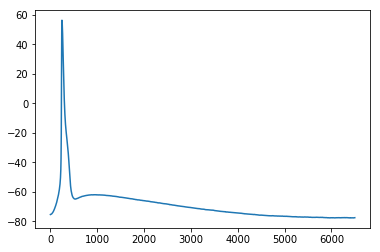

In [40]:
v_dap = np.copy(np.array(x['data']))
v_dap = v_dap[t_on:]
plt.plot(v_dap);v

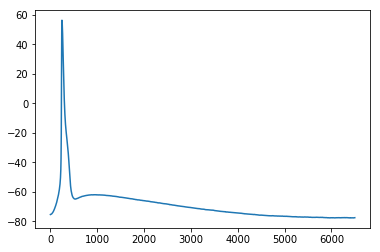

In [59]:
idx = np.where(t == t_on)[0][0]
v_dap = np.copy(np.array(x['data']))
v_x = v_dap[idx:]
plt.plot(v_x);

In [62]:
t_on

55

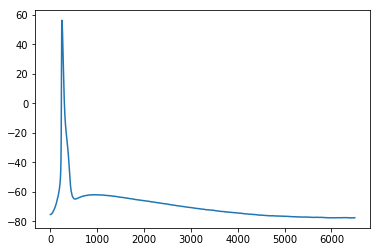

In [24]:
v_all = v_all[(t>t_on)]
plt.plot(v_all);

In [26]:
std_pw = np.power(np.std(v), np.linspace(3,n_mom,n_mom-2))
std_pw

array([3.67852705, 5.67847788, 8.76576701])

In [27]:
std_pw = np.concatenate((np.ones(1),std_pw))
std_pw

array([1.        , 3.67852705, 5.67847788, 8.76576701])

In [28]:
moments = spstats.moment(v, np.linspace(2,n_mom,n_mom-1))/std_pw

In [29]:
ind = np.where(v_all > rest_pot)

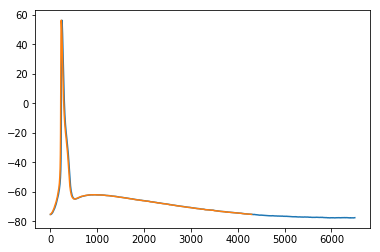

In [30]:
v2 = v_all[ind[0][0]:ind[0][-1]]
plt.plot(v_all);
plt.plot(v2);


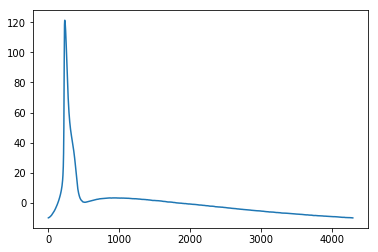

In [31]:
v_on_off = v2 - np.mean(v2)
plt.plot(v_on_off);

### Auto-correlation of the signal

In [ ]:
# auto-correlations
# x_on_off = x['data'][(t > t_on) & (t < t_off)]-np.mean(x['data'][(t > t_on) & (t < t_off)])
x_on_off = v_on_off
x_corr_val = np.dot(x_on_off,x_on_off)


In [ ]:
xcorr_steps = np.linspace(1./dt,n_xcorr*1./dt,n_xcorr).astype(int)
xcorr_steps

In [ ]:
x_corr_full = np.zeros(n_xcorr)
x_corr_full

In [ ]:
for ii in range(n_xcorr):
    x_on_off_part = np.concatenate((x_on_off[xcorr_steps[ii]:],np.zeros(xcorr_steps[ii])))
    x_corr_full[ii] = np.dot(x_on_off,x_on_off_part)

x_corr1 = x_corr_full/x_corr_val
x_corr1

### Moments of the signal

In [ ]:
v = v_on_off
v

In [ ]:
std_pw = np.power(np.std(v), np.linspace(3,n_mom,n_mom-2))
std_pw

In [ ]:
std_pw = np.concatenate((np.ones(1),std_pw))
std_pw

In [ ]:
moments = spstats.moment(v, np.linspace(2,n_mom,n_mom-1))/std_pw

In [ ]:
np.linspace(2,n_mom,n_mom-1)

In [ ]:
moments

In [ ]:
spstats.moment(v2, moment=[0,1,2,3,4])

In [ ]:
spstats.moment?
